In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hr_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Preprocessing

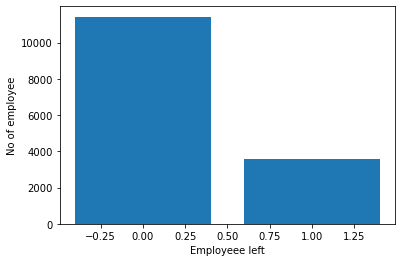

In [5]:
left_count = data.groupby('churn').count()
plt.bar(left_count.index.values,left_count['satisfaction'])
plt.xlabel('Employeee left')
plt.ylabel('No of employee')
plt.show()

In [6]:
data = pd.get_dummies(data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   evaluation              14999 non-null  float64
 2   number_of_projects      14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   churn                   14999 non-null  int64  
 7   promotion               14999 non-null  int64  
 8   department_IT           14999 non-null  uint8  
 9   department_RandD        14999 non-null  uint8  
 10  department_accounting   14999 non-null  uint8  
 11  department_hr           14999 non-null  uint8  
 12  department_management   14999 non-null  uint8  
 13  department_marketing    14999 non-null  uint8  
 14  department_product_mng  14999 non-null

In [8]:
x = data.drop(['churn'],axis = 1)

In [9]:
y = data['churn']

## Train Test and Split

from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 23)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11249, 20)
(3750, 20)
(11249,)
(3750,)


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)

E:\Important\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [17]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

accuracy_score 0.7874666666666666
precision 0.658252427184466
recall 0.353125
f1_score 0.45966101694915257


## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dft_model = DecisionTreeClassifier()
dft_model.fit(x_train,y_train)
y_pred = dft_model.predict(x_test)

In [20]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

accuracy_score 0.9786666666666667
precision 0.9489795918367347
recall 0.96875
f1_score 0.9587628865979382


In [21]:
confusion_matrix(y_test,y_pred)

array([[2740,   50],
       [  30,  930]], dtype=int64)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rft_model = RandomForestClassifier()
rft_model.fit(x_train,y_train)
y_pred = rft_model.predict(x_test)

In [24]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy_score 0.9912
precision 0.9946638207043756
recall 0.9708333333333333
f1_score 0.9826041117554033


array([[2785,    5],
       [  28,  932]], dtype=int64)

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    metric_k.append(acc)

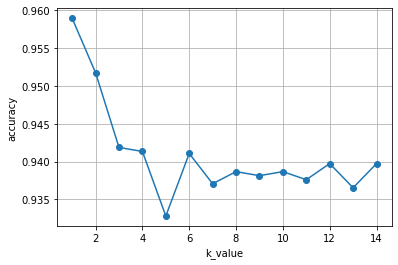

In [27]:
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')
plt.grid()

In [28]:
#Now we know n_neighbors = 1
classifier = KNeighborsClassifier(n_neighbors = 1,metric = 'minkowski',p = 2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [29]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy_score 0.9589333333333333
precision 0.8958742632612967
recall 0.95
f1_score 0.9221435793731042


array([[2684,  106],
       [  48,  912]], dtype=int64)

## Support Vector Machine

In [30]:
from sklearn.svm import SVC

In [31]:
classifier = SVC(kernel = 'rbf',random_state = 1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [32]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy_score 0.7589333333333333
precision 1.0
recall 0.058333333333333334
f1_score 0.11023622047244094


array([[2790,    0],
       [ 904,   56]], dtype=int64)

In [34]:
x_test.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
14439,0.85,0.95,5,236,5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13733,0.50,0.92,4,266,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
13253,0.97,0.89,4,208,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4135,0.16,0.74,5,205,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
599,0.11,0.92,7,307,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [35]:
y_test.head()

14439    1
13733    0
13253    0
4135     0
599      1
Name: churn, dtype: int64

In [36]:
x_train.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
13373,0.78,0.89,4,137,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
284,0.38,0.47,2,144,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4675,0.65,0.48,3,131,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7089,0.46,0.49,5,286,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3259,0.62,0.58,3,202,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [38]:
y_train.head()

13373    0
284      1
4675     0
7089     0
3259     0
Name: churn, dtype: int64

In [39]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)